# 数据探索：游戏用户行为数据的深度探索
## 1. 导入数据，了解数据基本信息

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
data = pd.read_csv(r".\数据\tap4fun竞赛数据\tap_fun_train.csv")

In [3]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [4]:
data.shape #107个特征，首列为id，最后一列为付费金额（标签）

(2288007, 109)

对于这样大规模的数据，在个人电脑上倾向于先使用简单模型如线性回归逻辑回归试试，而不选择复杂模型如决策树、随机森林、XGBoost
### 更换列名为中文

In [5]:
column_name = pd.read_excel(r".\数据\tap4fun竞赛数据\tap4fun 数据字段解释.xlsx")

In [6]:
column_name.head()

,字段名,字段解释,数据时间,变量性质,Unnamed: 4
0,user_id,玩家唯一ID,永久,ID,目标：使用玩家在前7日的行为数据，预测玩家前45日付费金额。
1,register_time,玩家注册时间,永久,自变量,NaN
2,wood_add_value,木头获取数量,前七日,自变量,NaN
3,wood_reduce_value,木头消耗数量,前七日,自变量,NaN
4,stone_add_value,石头获取数量,前七日,自变量,NaN


In [7]:
data.columns = column_name['字段解释']

In [8]:
data.head()

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [9]:
# 查看完整特征列表
data.columns.tolist()

['玩家唯一ID',
 '玩家注册时间',
 '木头获取数量',
 '木头消耗数量',
 '石头获取数量',
 '石头消耗数量',
 '象牙获取数量',
 '象牙消耗数量',
 '肉获取数量',
 '肉消耗数量',
 '魔法获取数量',
 '魔法消耗数量',
 '勇士招募数量',
 '勇士损失数量',
 '驯兽师招募数量',
 '驯兽师损失数量',
 '萨满招募数量',
 '萨满损失数量',
 '勇士伤兵产生数量',
 '勇士伤兵恢复数量',
 '驯兽师伤兵产生数量',
 '驯兽师伤兵恢复数量',
 '萨满伤兵产生数量',
 '萨满伤兵恢复数量',
 '通用加速获取数量',
 '通用加速使用数量',
 '建筑加速获取数量',
 '建筑加速使用数量',
 '科研加速获取数量',
 '科研加速使用数量',
 '训练加速获取数量',
 '训练加速使用数量',
 '治疗加速获取数量',
 '治疗加速使用数量',
 '建筑：士兵小屋等级',
 '建筑：治疗小井等级',
 '建筑：要塞等级',
 '建筑：据点传送门等级',
 '建筑：兵营等级',
 '建筑：治疗之泉等级',
 '建筑：智慧神庙等级',
 '建筑：联盟大厅等级',
 '建筑：仓库等级',
 '建筑：瞭望塔等级',
 '建筑：魔法幸运树等级',
 '建筑：战争大厅等级',
 '建筑：联盟货车等级',
 '建筑：占卜台等级',
 '建筑：祭坛等级',
 '建筑：冒险传送门等级',
 '科研：侦查等级',
 '科研：训练速度等级',
 '科研：守护者',
 '科研：巨兽驯兽师',
 '科研：吟唱者',
 '科研：勇士攻击',
 '科研：驯兽师攻击',
 '科研：萨满攻击',
 '科研：战斗大师',
 '科研：高阶巨兽骑兵',
 '科研：图腾大师',
 '科研：部队防御',
 '科研：勇士防御',
 '科研：驯兽师防御',
 '科研：萨满防御',
 '科研：勇士生命',
 '科研：驯兽师生命',
 '科研：萨满生命',
 '科研：狂战士',
 '科研：龙骑兵',
 '科研：神谕者',
 '科研：部队攻击',
 '科研：建造速度',
 '科研：资源保护',
 '科研：部队消耗',
 '科研：木材生产',
 '科研：石头生产',
 '科研：象牙生产',
 '科研：肉类生产',
 '科研：木材采集',
 '科研：石头采集',


资源/等级/道具/技能
除了最后的标签“45日付费金额”外，所有的特征都是用户在服前7日或与时间无关的数据（如用户ID）

In [10]:
# 查看数据的其他信息，包括索引类型/数据类型/数据大小等
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, 玩家唯一ID to 45日付费金额
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


由于数据量过大info函数无法显示出缺失值情况
分析各个特征，通常当数据类型为整数时倾向于离散型特征（而非浮点型），但从游戏业务独特性以及特征含义来看，资源数量/等级/发起PVP次数等信息一般不会以浮点数表示，因此显示为整数正常
从特征含义来看，认为该数据集特征都为连续型

In [11]:
# 检查是否存在缺失值
data.isnull().sum() # 不存在缺失值

字段解释
玩家唯一ID     0
玩家注册时间     0
木头获取数量     0
木头消耗数量     0
石头获取数量     0
          ..
PVE胜利次数    0
在线时长       0
付费金额       0
付费次数       0
45日付费金额    0
Length: 109, dtype: int64

In [12]:
data.isnull().sum().sum() # 不存在缺失值

0

In [13]:
data.duplicated().sum() # 不存在重复值

0

In [14]:
# 检查id唯一吗
data["玩家唯一ID"].duplicated().sum()

0

In [15]:
data['科研：肉类生产']

0          0
1          0
2          0
3          0
4          0
          ..
2288002    0
2288003    0
2288004    0
2288005    0
2288006    0
Name: 科研：肉类生产, Length: 2288007, dtype: int64

### 查看分布和统计信息

通常使用joyplot查看分布特征
但对百万级数据joyplot运行非常缓慢，大部分绘制分布图的函数（joyplot、ggplot）都无法适应百万级数据。
因此退而求其次，使用describe函数

In [16]:
data.describe() # 查看分布和基本统计信息

字段解释,玩家唯一ID,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.020749e+01,5.346691e-01,5.770699e-02,1.793146e+00
std,9.399393e+05,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,9.662892e+05,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.895946e+01,2.263835e+01,7.090886e-01,8.846303e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


In [17]:
data.describe().T # 查看分布和基本统计信息

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288007.0,1.529543e+06,9.399393e+05,1.0,749992.5,1.419095e+06,2.299006e+06,3.190530e+06
木头获取数量,2288007.0,4.543069e+05,4.958667e+06,0.0,0.0,4.203800e+04,1.531180e+05,1.239962e+09
木头消耗数量,2288007.0,3.698433e+05,3.737720e+06,0.0,0.0,9.830000e+03,9.855700e+04,7.995875e+08
石头获取数量,2288007.0,1.897788e+05,4.670620e+06,0.0,0.0,0.000000e+00,0.000000e+00,1.214869e+09
石头消耗数量,2288007.0,1.376074e+05,3.370166e+06,0.0,0.0,0.000000e+00,0.000000e+00,7.962378e+08
...,...,...,...,...,...,...,...,...
PVE胜利次数,2288007.0,2.556749e+00,1.184737e+01,0.0,0.0,0.000000e+00,1.000000e+00,4.880000e+02
在线时长,2288007.0,1.020749e+01,3.895946e+01,0.0,0.5,1.833333e+00,4.833333e+00,2.049667e+03
付费金额,2288007.0,5.346691e-01,2.263835e+01,0.0,0.0,0.000000e+00,0.000000e+00,7.457950e+03


数据分布整体左偏，玩家留存到第二日基本流失

## 2. 标签的探索：游戏经营的重要指标与经营状况

In [18]:
data.columns

Index(['玩家唯一ID', '玩家注册时间', '木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量',
       '象牙消耗数量', '肉获取数量', '肉消耗数量',
       ...
       'PVP次数', '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数', 'PVE胜利次数',
       '在线时长', '付费金额', '付费次数', '45日付费金额'],
      dtype='object', name='字段解释', length=109)

In [19]:
y = data.iloc[:,-1] #最后一列：45日付费金额
SevenDayPayAmount = data.loc[:,"付费金额"] # 另外探索下7天内的经营状况

In [20]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2288002    0.0
2288003    0.0
2288004    0.0
2288005    0.0
2288006    0.0
Name: 45日付费金额, Length: 2288007, dtype: float64

In [21]:
# 探索y分布
y.describe([0.75, 0.9, 0.99]) # 游戏中通常有10%的付费用户养全服的情况，因此添加0.9和0.99选项

count    2.288007e+06
mean     1.793146e+00
std      8.846303e+01
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
99%      3.970000e+00
max      3.297781e+04
Name: 45日付费金额, dtype: float64

从分布来看，接近99%的用户都没有付费，游戏转化可能存在大问题

In [22]:
def RevenueFocus(RevenueSeries):
    # 用于展示7日与45日氪金情况的关键指标
    # 只能是Series结构
    
    # 中间变量
    AllUsers = len(RevenueSeries) # 全部用户
    PaidUsers = (RevenueSeries != 0).sum() # 付费用户量
    TotalPayment = RevenueSeries.sum() # 总付费金额
    
    # 打印结果
    print("付费率：{:.3f}%".format(100*PaidUsers/AllUsers))
    print("付费人数：{}".format(PaidUsers))
    print("转化总金额：{:.3f}".format(TotalPayment))
    print("ARPU：{:.3f}".format(TotalPayment/AllUsers)) # ARPU 用户平均收入
    print("ARPPU：{:.3f}".format(TotalPayment/PaidUsers)) # ARPPU 付费用户平均收入
    print("前500高氪用户金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:500].sum()/TotalPayment))
    print("前1000高氪用户金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:1000].sum()/TotalPayment))
    print("前5000高氪用户金额占比：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:5000].sum()/TotalPayment))

In [23]:
# 45日转化情况
RevenueFocus(y)

付费率：2.010%
付费人数：45988
转化总金额：4102730.110
ARPU：1.793
ARPPU：89.213
前500高氪用户金额占比：51.618%
前1000高氪用户金额占比：64.878%
前5000高氪用户金额占比：89.375%


ARPPU 比较高，说明付费用户整体水平较高或者大氪玩家金额高
可以看到转化率较低，200多万用户中前5000用户氪金89%，约0.00218

In [24]:
# 7日转化情况
RevenueFocus(SevenDayPayAmount)

付费率：1.811%
付费人数：41439
转化总金额：1223326.660
ARPU：0.535
ARPPU：29.521
前500高氪用户金额占比：45.211%
前1000高氪用户金额占比：57.231%
前5000高氪用户金额占比：83.002%


一般来说，游戏行业付费率为10%-15%，可能为游戏稳定后，可以看出给i游戏付费率较低
2016年全球F2P（free to play）手游的付费率就有2.3%，tap4fun在开服测试就有200w用户，转化率应该更高。
2020年SLG手游的平均付费率大约在5%左右，顶级手游的付费率接近15%，在流量昂贵的现在，一个月400w的收入获取还不能覆盖掉200w用户的流量成本，收入状况不算特别理想

In [25]:
# 7-45日新增付费用户数
45988-41439

4549

In [26]:
# 7-45日新增付费用户占7日前未氪金用户比例
100*4549/(SevenDayPayAmount == 0).sum()

0.2024866373953515

意味着一个新玩家在开服前期7天内未氪金，那么他在未来一个月内99.8%的可能不会氪金，这可能由于
>1. 所有用户都留存到了45日之后，这说明新用户福利过去后，游戏中的转化手段非常贫瘠，转化刺激严重不足
>2. 大部分用户在45日之前已经流失，因此才没有继续转化为氪金用户的机会

同时，我们计算7日之后再也没有付费的用户


In [27]:
# 7日后再也没付费的用户
# 即45日时付费金额与7日付费金额相同，且7日时付过费的用户
SevenDayPayAmount[SevenDayPayAmount == y] # 筛选除了7天付费金额与45天付费金额一致的用户

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2288002    0.0
2288003    0.0
2288004    0.0
2288005    0.0
2288006    0.0
Name: 付费金额, Length: 2272149, dtype: float64

In [28]:
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].count()

30130

In [29]:
# 占7天总付费人数的占比
100*30130/41439

72.70928352518159

7日前付过费，但之后再没付费的用户有3玩多，占比前7天总付费用户的72%
。
**即一个新玩家在服前七天有氪金，但他在未来一个月内还是有7成的概率不再继续氪金**。这可能说明：
1. 对大部分用户而言，最初氪的是超低价/超优惠新手礼包，后续氪金礼包中的福利/以及价格超出了大部分用户对氪金的心理预期
2. 新手礼包力度过大，导致后续氪金礼包的福利看起来不够实惠，用户再付费门槛较高
3. 游戏本身粘性不足，无论用户是否氪金，大部分人都在7-45日内自然流失了（甚至在前7日久流失了大部分）
4. 开局需要发育时玩家更愿意氪金解决问题（痒感充足），发育起来之后便不再具有强烈氪金需求/发育不起来直接退服了
5. （可能性较小，仅针对少部分前7日巨氪但之后不再氪的大佬）氪金后体验一般甚至较差。例如，发现氪几百、上千元对玩家竞争力无明显提升

In [30]:
# 7日后再也没有付过费的用户前7日的氪金情况
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].describe()

count    30130.000000
mean        11.407407
std         71.134875
min          0.990000
25%          0.990000
50%          1.980000
75%          5.980000
max       4086.520000
Name: 付费金额, dtype: float64

In [31]:
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].sum()

343705.17000000004

In [32]:
# 7日后继续付费的用户前7日的氪金情况
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0].describe()

count    11309.000000
mean        77.780661
std        289.610458
min          0.990000
25%          2.980000
50%         15.970000
75%         45.940000
max       7457.950000
Name: 付费金额, dtype: float64

In [33]:
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0].sum()

879621.4900000001

In [34]:
# 7日后继续付费的用户在45日时的氪金情况
y[SevenDayPayAmount != y][SevenDayPayAmount != 0].describe()

count    11309.000000
mean       315.963475
std       1202.828424
min          1.980000
25%         16.940000
50%         48.920000
75%        163.760000
max      32977.810000
Name: 45日付费金额, dtype: float64

可以看出,7日后继续付费的用户在前7天会氪更多的金额，7日后不再氪金的玩家有75%都只氪了6元以下的金额，而7日后继续氪金的玩家中有50%以上都氪了16元左右，这极大地印证了我们提出的第一条理由：**大部分人氪新手礼包，而后续礼包的价格在大部分人的心里预期之外。**
同时，7日后不再氪金的玩家中也有不少氪过百元到千元以上的玩家，最终放弃游戏可能是因为自然流失/氪金后体验不足以满足部分用户的想象。但从7日后继续付费的用户氪金情况来看，用户是倾向于约氪越多的。因此大部分用户对于氪金后的感受应该是满意的。

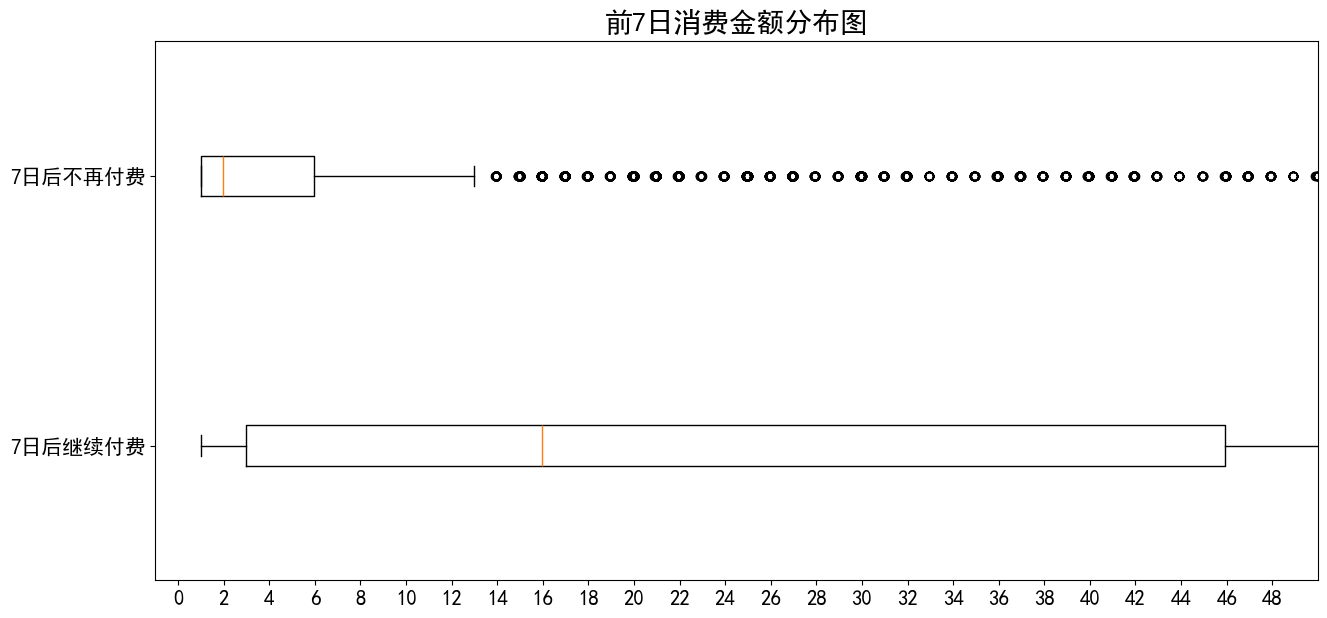

In [35]:
# 使用箱线图来对比两类用户在前7日的氪金情况

plt.figure(figsize=(15,7))
plt.boxplot([SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0],SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0]],
            labels=["7日后继续付费","7日后不再付费"],
            vert=False,
            showmeans=False)
plt.xlim(-1,50)
plt.title('前7日消费金额分布图',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,50,2),fontsize=15.0)
plt.show()



**高价值用户评判的第一个可能的标准：前7日氪金超过6元的用户是更有价值的用户**

以此推测，新手礼包设置为5-7元，或许可以明确辨析出用户的付费能力

对于7日内已氪用户而言，氪任意金额的用户都有一定的概率继续氪金，也有一定的概率不再氪金，且两个概率相加为1。举个简单的例子：

假设前7日付费金额超过n元的有60人，在这60人中，后续继续氪金的是20人，不再氪金的是40人，那我们就可以说，

**当用户前7日消费超过n元时，继续氪金的概率是**$20/60=33%$，**不再氪金的概率是**$40/60=66%$。

随着前7日内氪金的金额变大，继续氪金的概率会越来越大，不再氪金的概率会越来越小，因此，**必然存在一个金额点，当用户在前7日内付费的金额超过该金额点时，该用户继续氪金的可能性大于不再氪金的可能性**。该金额点就是适合作为新手礼包设置的点。

### 找出氪金临界点

In [36]:
#考虑到后续付费用户有50%都付了16元及以上，我们推测这个金额点应该是在16元以下的，因此我们设置潜在金额的范围为1-16。
PotentialPoints = range(1,16)

In [37]:
[*PotentialPoints]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [38]:
for i in PotentialPoints:
    #取出所有7天内付费金额超出i的付费用户
    HigherThanPoint = SevenDayPayAmount[SevenDayPayAmount >= i] 
    #这些用户中，继续付费的用户所占的比例
    KeepPaid = len(HigherThanPoint[SevenDayPayAmount != y])/len(HigherThanPoint) 
    #这些用户中，停止付费的用户所占的比例，其实就是1-KeepPaid
    StopPaid = len(HigherThanPoint[SevenDayPayAmount == y])/len(HigherThanPoint)
    print('7日内氪金金额',i)
    print("继续氪金概率：{:.3f}%".format(100*KeepPaid))
    print("不再氪金概率：{:.3f}%".format(100*StopPaid))
    print("继续付费概率与不再付费概率差值 {:.3f}%".format(KeepPaid - StopPaid))
    if KeepPaid - StopPaid > 0:
        print('-----------------------------------')
        print("当7日内付费金额大于{:.2f}时，用户继续氪金的可能性比不再氪金的可能性更高！".format(i))
        break

7日内氪金金额 1
继续氪金概率：37.683%
不再氪金概率：62.317%
继续付费概率与不再付费概率差值 -0.246%
7日内氪金金额 2
继续氪金概率：43.720%
不再氪金概率：56.280%
继续付费概率与不再付费概率差值 -0.126%
7日内氪金金额 3
继续氪金概率：45.759%
不再氪金概率：54.241%
继续付费概率与不再付费概率差值 -0.085%
7日内氪金金额 4
继续氪金概率：46.532%
不再氪金概率：53.468%
继续付费概率与不再付费概率差值 -0.069%
7日内氪金金额 5
继续氪金概率：48.094%
不再氪金概率：51.906%
继续付费概率与不再付费概率差值 -0.038%
7日内氪金金额 6
继续氪金概率：50.778%
不再氪金概率：49.222%
继续付费概率与不再付费概率差值 0.016%
-----------------------------------
当7日内付费金额大于6.00时，用户继续氪金的可能性比不再氪金的可能性更高！


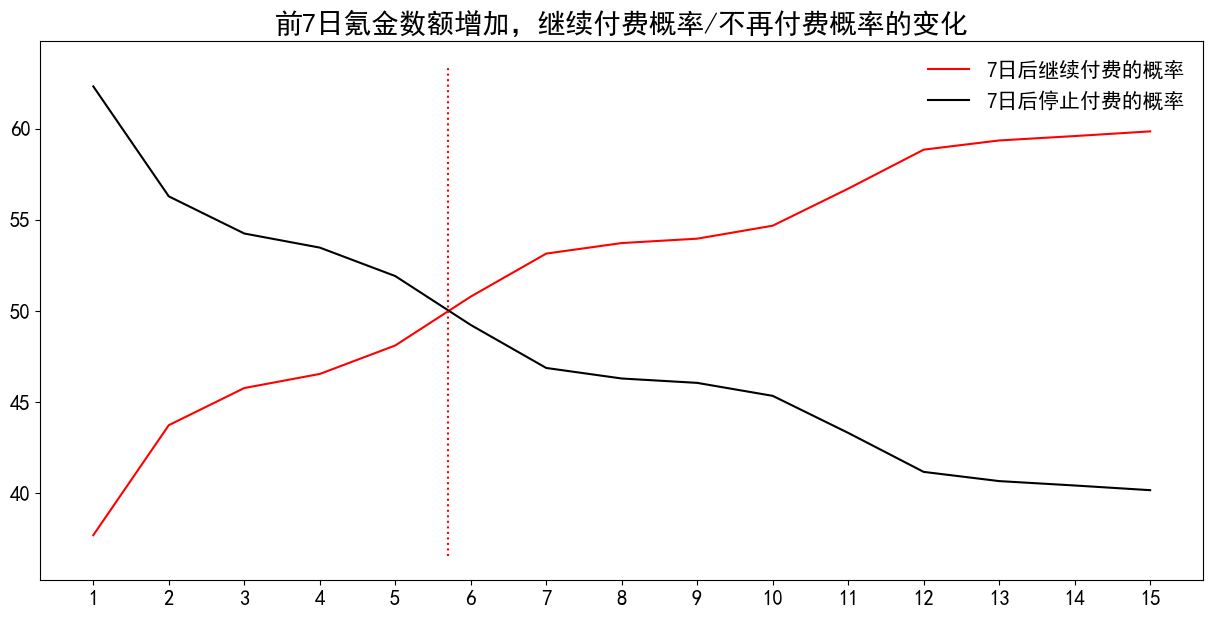

In [39]:
KeepPaidList = []
StopPaidList = []
for i in PotentialPoints:
    #取出所有7天内付费金额超出i的付费用户
    HigherThanPoint = SevenDayPayAmount[SevenDayPayAmount>=i] 
    #这些用户中，继续付费的用户所占的比例
    KeepPaid = len(HigherThanPoint[SevenDayPayAmount != y])/len(HigherThanPoint) 
    #这些用户中，停止付费的用户所占的比例
    StopPaid = len(HigherThanPoint[SevenDayPayAmount == y])/len(HigherThanPoint)
    KeepPaidList.append(100*KeepPaid)
    StopPaidList.append(100*StopPaid)

plt.figure(figsize=(15,7))
plt.plot(PotentialPoints,KeepPaidList,label="7日后继续付费的概率",color="red")
plt.plot(PotentialPoints,StopPaidList,label="7日后停止付费的概率",color="k")
#plt.xlim(-1,50)
plt.title('前7日氪金数额增加，继续付费概率/不再付费概率的变化',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,16,1),fontsize=15.0)
plt.legend(fontsize = 15.0, frameon = False)
plt.vlines(5.7,ymin = plt.ylim()[0]+0.1,ymax = plt.ylim()[1]-0.1,colors="red",linestyles="dotted")
plt.show()

在前7日内付费6元以下的用户，无论是否自然流失，未来氪金的可能性都是小于不再付费的可能性的。可以通过设置游戏体验，给与付费5元左右的用户更多的“刺激”，让他们后续继续付费。也可选择直接放弃6元以下的付费用户，体验维持现状或减少资源分配，让更多的资源/服务围绕更有可能付费的用户展开。

### 收入分析

In [40]:
#45日转化情况
RevenueFocus(y)

付费率：2.010%
付费人数：45988
转化总金额：4102730.110
ARPU：1.793
ARPPU：89.213
前500高氪用户金额占比：51.618%
前1000高氪用户金额占比：64.878%
前5000高氪用户金额占比：89.375%


In [41]:
y.max()

32977.81

In [42]:
#7日转化情况
RevenueFocus(SevenDayPayAmount)

付费率：1.811%
付费人数：41439
转化总金额：1223326.660
ARPU：0.535
ARPPU：29.521
前500高氪用户金额占比：45.211%
前1000高氪用户金额占比：57.231%
前5000高氪用户金额占比：83.002%


来看ARPU与ARPPU数据。ARPU是全服用户平均收入，ARPPU是全服付费用户平均收入，目前来看全服的ARPU较低，但ARPPU还不错，这说明虽然付费人数不多，但是大R（大人民币玩家）的付费能力相对较强。

从前5000高氪用户金额占比来看，45日时全服氪金前5000的人(占比小于0.22%)提供了全服89%的收入，大RMB玩家贡献巨大。

猜测，《野蛮时代》中的氪金行为应该与玩家竞争力有较为直接的联系，因为许多大R玩家非常偏爱强PK类游戏，付费可以直接让PVP变得异常简单。

不过全服最氪玩家在一个月内的消费只有3w2，在SLG手游领域并非一个很高的数字，如果游戏体验优秀，应该还有很大的上升空间。而付费人数不多的问题还可以改善，游戏整体的经营成果还可以上一个台阶。

## 3. 特征探索
### 3.1 在线时长： 用户是否以超出常规的速度流失?

在分析收入和资源的分布状况时，我们曾推测用户可能以超出常规的速度在流失。

通常来说，任意手游的次日留存率及格线应该在50%以上，7日留存应该在30%左右，一个成功的手游则需要在7日达到50%左右的留存，而《野蛮时代》可
能并达不到这个次日留存50%的及格线。

在特征当中，有一列“在线时长”，是前7日用户在线的时长。通过判断用户在
线时长，我们可以大约估计出用户流失的速度。

In [43]:
data.columns

Index(['玩家唯一ID', '玩家注册时间', '木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量',
       '象牙消耗数量', '肉获取数量', '肉消耗数量',
       ...
       'PVP次数', '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数', 'PVE胜利次数',
       '在线时长', '付费金额', '付费次数', '45日付费金额'],
      dtype='object', name='字段解释', length=109)

In [44]:
PlayTime = data.loc[:,"在线时长"]

In [45]:
PlayTime.max()

2049.666667

原数据并未说明这个衡量时间的特征的单位，但7日为168小时，因此该特征的单位应该是分钟。前7日内游戏时长最长的玩家玩了2049分钟，即34个小时，每日玩5个小时以上，也是铁杆玩家可以达得到的数据，单位为分钟是合理的。

In [46]:
pd.set_option("display.float_format", lambda x: "%.3f" % x) #避免显示问题，设置不显示科学计数法
PlayTime.describe()

count   2288007.000
mean         10.207
std          38.959
min           0.000
25%           0.500
50%           1.833
75%           4.833
max        2049.667
Name: 在线时长, dtype: float64

75%的人在前7日一共只玩了4.8分钟或以下，这是说超过75%的用户只是稍微看了一眼游戏就被劝退了。

In [47]:
PlayTime.describe(percentiles=[0.75,.9,0.95,.99]) #查看一下90%以上的分布

count   2288007.000
mean         10.207
std          38.959
min           0.000
50%           1.833
75%           4.833
90%          15.000
95%          41.333
99%         183.657
max        2049.667
Name: 在线时长, dtype: float64

SLG游戏天生会充满许多任务、奖励和剧情，除非用户登录即退出，否则登入一次至少应该停留5分钟以上，新用户停留的时间应当更长（有非常多的内容需要探索、任务列表也很长）。

如果一个用户在注册游戏后第二天依然被留存下来、并参与到游戏当中，那两天在线时长至少也应该有15-20分钟。75%的用户在前7日内只玩了4.8分钟，而如下所示，90%的用户在7日内只玩了15分钟以下。

据推断，大约只有10~15%的用户在第二天依然留存下来，同时每天大约玩10分钟，7日后依然留存下来的用户大约少于5%。用户的确以超出常规的方式流失，在这种流失方式下，付费率也很难被拯救。

建议先做留存分析，提高留存

In [48]:
#谁是这个玩了2049分钟的用户？
(data["在线时长"] > 2000).sum() 
data.loc[data["在线时长"] > 2049,:] #69木头获取，69w肉获取

# 时长长，但体验深度低，可能测试人员，GM

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
488497,645487,2018-03-04 13:43:36,697852.000,300255.000,0.000,0.000,6000.000,0.000,690379.000,196602.000,...,5,0,0,2,2,2,2049.667,0.000,0,0.000


In [49]:
data.loc[data["在线时长"] > 1500,:] #比起时长，是否更加深度参与游戏或许才与氪金更相关

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
488497,645487,2018-03-04 13:43:36,697852.000,300255.000,0.000,0.000,6000.000,0.000,690379.000,196602.000,...,5,0,0,2,2,2,2049.667,0.000,0,0.000
1263615,1579134,2018-03-05 11:04:18,15722711.000,15269965.000,8895972.000,7952637.000,4554662.000,3025143.000,23321313.000,21071538.000,...,48,25,11,100,100,86,1674.667,2.980,2,514.680


肝帝一般付费低

1263615用户资源量丰富，氪金500左右不高，符合特征

In [50]:
#尝试查找氪金用户们前7日的游戏时间
PaidPlayTime = data.loc[data["付费金额"] != 0,"在线时长"]
PaidPlayTime.describe().T #只有25%以下的用户在线时间在半小时以下，游戏时间明显比非氪金用户多很多

count   41439.000
mean      140.188
std       149.973
min         0.000
25%        33.000
50%        88.833
75%       194.667
max      1674.667
Name: 在线时长, dtype: float64

在线时长甚至不足1分钟的闭眼氪玩家们，有40人氪了0.99

In [51]:
data.loc[data["在线时长"]<=1,"付费金额"].value_counts()

付费金额
0.000     896061
0.990         51
9.990          4
4.990          3
36.960         3
5.980          3
56.950         2
99.990         2
25.970         1
1.990          1
49.990         1
26.970         1
6.980          1
19.990         1
Name: count, dtype: int64

- 在线时间很长的用户也不一定就是高氪大佬
- 在线时间很短的用户也不一定就完全不氪
- 如何就在线时间这个点来进行用户价值判断呢？

In [52]:
#在线时长很少的玩家们贡献的氪金数额
for playtime in [1,5,15,20,25,30]:
    
    MeanPay45 = data.loc[data["在线时长"]<playtime,"45日付费金额"].mean()
    TotalPay45 = data.loc[data["在线时长"]<playtime,"45日付费金额"].sum()
    MeanPay7 = data.loc[data["在线时长"]<playtime,"付费金额"].mean()
    TotalPay7 = data.loc[data["在线时长"]<playtime,"付费金额"].sum()
    
    print("一周在线时长不足{}分钟".format(playtime))
    print("\t45日平均消费额为{:.3f}元，45日总消费额为{:.3f}元".format(MeanPay45,TotalPay45))
    print("\t7日平均消费额为{:.3f}元，7日总消费额为{:.3f}元".format(MeanPay7,TotalPay7))
    print("\t7日氪金占比{:.3f}%，45日氪金占比{:.3f}%".format(100*TotalPay7/(data["付费金额"].sum())
                                                  ,100*TotalPay45/(data["45日付费金额"].sum())))

一周在线时长不足1分钟
	45日平均消费额为0.022元，45日总消费额为18323.490元
	7日平均消费额为0.001元，7日总消费额为574.180元
	7日氪金占比0.047%，45日氪金占比0.447%
一周在线时长不足5分钟
	45日平均消费额为0.019元，45日总消费额为32572.700元
	7日平均消费额为0.003元，7日总消费额为4519.280元
	7日氪金占比0.369%，45日氪金占比0.794%
一周在线时长不足15分钟
	45日平均消费额为0.028元，45日总消费额为57753.190元
	7日平均消费额为0.009元，7日总消费额为18428.260元
	7日氪金占比1.506%，45日氪金占比1.408%
一周在线时长不足20分钟
	45日平均消费额为0.038元，45日总消费额为79124.920元
	7日平均消费额为0.012元，7日总消费额为25904.310元
	7日氪金占比2.118%，45日氪金占比1.929%
一周在线时长不足25分钟
	45日平均消费额为0.044元，45日总消费额为94650.110元
	7日平均消费额为0.016元，7日总消费额为34217.390元
	7日氪金占比2.797%，45日氪金占比2.307%
一周在线时长不足30分钟
	45日平均消费额为0.050元，45日总消费额为107763.140元
	7日平均消费额为0.019元，7日总消费额为40862.200元
	7日氪金占比3.340%，45日氪金占比2.627%


不难发现，在线时长很少的玩家们贡献的氪金数额很少，在对200w人进行建模时，我们可以忽略一部分在线时间很短的用户。在这里，我们可以将一周在线时长不足15或20分钟的用户判断为低价值用户。

In [53]:
data["在线时长"].sort_values(ascending=False)[:2288] #最肝的前0.1%的用户的7日在线时长

488497    2049.667
1263615   1674.667
882241    1482.000
1335561   1452.333
1558221   1452.333
            ...   
527722     504.500
1257763    504.333
2145496    504.333
2065723    504.333
1815137    504.333
Name: 在线时长, Length: 2288, dtype: float64

In [54]:
#在线时长超长的玩家们贡献的氪金数额
for playtime in [500,600,700,800,900,1000,1200]:
    
    MeanPay45 = data.loc[data["在线时长"]>=playtime,"45日付费金额"].mean()
    TotalPay45 = data.loc[data["在线时长"]>=playtime,"45日付费金额"].sum()
    MeanPay7 = data.loc[data["在线时长"]>=playtime,"付费金额"].mean()
    TotalPay7 = data.loc[data["在线时长"]>=playtime,"付费金额"].sum()
    
    print("一周在线时长超过{}分钟".format(playtime))
    print("\t45日平均消费额为{:.3f}元，45日总消费额为{:.3f}元".format(MeanPay45,TotalPay45))
    print("\t7日平均消费额为{:.3f}元，7日总消费额为{:.3f}元".format(MeanPay7,TotalPay7))
    print("\t7日氪金占比{:.3f}%，45日氪金占比{:.3f}%".format(100*TotalPay7/(data["付费金额"].sum())
                                                  ,100*TotalPay45/(data["45日付费金额"].sum())))

一周在线时长超过500分钟
	45日平均消费额为377.113元，45日总消费额为885839.060元
	7日平均消费额为110.492元，7日总消费额为259544.740元
	7日氪金占比21.216%，45日氪金占比21.591%
一周在线时长超过600分钟
	45日平均消费额为437.753元，45日总消费额为515673.070元
	7日平均消费额为130.699元，7日总消费额为153963.300元
	7日氪金占比12.586%，45日氪金占比12.569%
一周在线时长超过700分钟
	45日平均消费额为427.776元，45日总消费额为272921.300元
	7日平均消费额为120.904元，7日总消费额为77136.600元
	7日氪金占比6.305%，45日氪金占比6.652%
一周在线时长超过800分钟
	45日平均消费额为359.040元，45日总消费额为113815.780元
	7日平均消费额为104.344元，7日总消费额为33076.950元
	7日氪金占比2.704%，45日氪金占比2.774%
一周在线时长超过900分钟
	45日平均消费额为218.907元，45日总消费额为36557.400元
	7日平均消费额为43.819元，7日总消费额为7317.770元
	7日氪金占比0.598%，45日氪金占比0.891%
一周在线时长超过1000分钟
	45日平均消费额为139.194元，45日总消费额为12109.910元
	7日平均消费额为40.055元，7日总消费额为3484.820元
	7日氪金占比0.285%，45日氪金占比0.295%
一周在线时长超过1200分钟
	45日平均消费额为25.492元，45日总消费额为637.300元
	7日平均消费额为2.869元，7日总消费额为71.730元
	7日氪金占比0.006%，45日氪金占比0.016%


许多用户虽然深度参与游戏，但是“好肝不好氪”，所以过于肝的用户也不是高价值用户。

我们可以规定，一周在线时长超出800分钟的用户为（氪金层面）低价值用户。

同样的，氪金用户一般在资源上占绝对的主导，但是资源很多的用户不一定是氪金用户。

In [55]:
data.loc[data["付费金额"] != 0,"木头获取数量"].describe() #资源量上氪金用户站绝对的主导

count        41439.000
mean      10712783.554
std       34752584.812
min              0.000
25%        2132829.500
50%        5267091.000
75%       10249321.000
max     1239962311.000
Name: 木头获取数量, dtype: float64

In [56]:
data.loc[data["付费金额"] == 0,"木头获取数量"].describe()

count     2246568.000
mean       265084.447
std        887773.641
min             0.000
25%             0.000
50%         40088.000
75%        144657.000
max     158249380.000
Name: 木头获取数量, dtype: float64

In [57]:
data[data["木头获取数量"] == 158249380] 
# 资源量大，游戏时间低
# 异常用户/非常牛的用户

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
2046401,2907550,2018-03-04 14:41:57,158249380.000,157202081.000,129870402.000,129357887.000,3000.000,0.000,69427801.000,68360181.000,...,282,0,0,2,1,1,125.000,0.000,0,0.000


不难发现，拥有众多资源、但在7日内却没有付费过的用户，是（氪金层面上）的低价值用户。

### 3.2 分布与偏度：游戏是否对新手不友好？资源获取难度设置合理吗？

在进行简单数据探索时，我们使用.describe()探索过特征的分布情况，并且发现大量的特征都是严重左偏的（即大部分值集中在左侧，分布上的高峰偏左严重）。

In [58]:
#pd.set_option("display.max_rows",120) #避免显示问题，设置一下最大行数
data.describe().T

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288007.000,1529543.498,939939.279,1.000,749992.500,1419095.000,2299006.500,3190530.000
木头获取数量,2288007.000,454306.859,4958667.146,0.000,0.000,42038.000,153118.000,1239962311.000
木头消耗数量,2288007.000,369843.252,3737720.038,0.000,0.000,9830.000,98557.000,799587506.000
石头获取数量,2288007.000,189778.774,4670619.517,0.000,0.000,0.000,0.000,1214869437.000
石头消耗数量,2288007.000,137607.363,3370166.356,0.000,0.000,0.000,0.000,796237770.000
...,...,...,...,...,...,...,...,...
PVE胜利次数,2288007.000,2.557,11.847,0.000,0.000,0.000,1.000,488.000
在线时长,2288007.000,10.207,38.959,0.000,0.500,1.833,4.833,2049.667
付费金额,2288007.000,0.535,22.638,0.000,0.000,0.000,0.000,7457.950


**数据左偏说明游戏中拥有大量资源人较少，因为相比起中线，大部分人在资源/等级上都值离原点更近。**

**如果所有的用户都留存到7日之后，资源数据分布应该是接近正态分布**，现在我们已经知道用户在前7天是严重流失的，资源分布会左偏也合理，但为何用户会流失如此严重呢？可能从流量端开始就有问题（比如投放到了不太合适的流量渠道）、投放的广告可能有问题（比如让用户误以为是其他类型游戏），也可能是游戏美工不足、吸引力较低等方面（在75%的用户看一眼就被劝退的前提下，有理由相信游戏美工和流畅度有较大问题）。


除了上述理由，用户大量流失还可能是游戏对新手不太友好或者游戏平衡性严重受氪金影响导致的。如果游戏中资源获取很困难，比如大部分资源都需要较长的时间或氪金来进行积累（这可能是刺激氪金的策略：新手阶段不友好，游戏上手难度大），大部分玩家在10~15分钟内无法获得足够的刺激与获得感，那用户在半小时内流失的可能性就很高。我们可以尝试着观察几个资源层次的平均游戏时间，以此来判断游戏中的资源是否难以获得：

In [59]:
data["木头获取数量"].describe()

count      2288007.000
mean        454306.859
std        4958667.146
min              0.000
25%              0.000
50%          42038.000
75%         153118.000
max     1239962311.000
Name: 木头获取数量, dtype: float64

In [60]:
data.loc[data["木头获取数量"] > 1239962310,"在线时长"] #在线时长约10个小时，即每天玩1个多小时，一周即可获得木头资源过亿

1423324   697.333
Name: 在线时长, dtype: float64

In [61]:
data.loc[data["木头获取数量"] == 153118,"在线时长"].mean() #平均在线约3.75分钟即可获得15w木头

3.75

In [62]:
data.loc[data["木头获取数量"] == 42038,"在线时长"].mean() #平均在线1分钟即可获得4w2木头

1.2527109844413011

从结果来看，至少木头资源一点也不难获得，反而来得太容易了。在手游界，可以轻松拥有百万资源、上亿资源的游戏一般都不太高级。

那是否其他资源非常难以获得呢？在现有数据下，我们可以通过**分析资源存量**来分析游戏中**资源获取难度**分类的合理性。

资源的分布本身就可以帮助进行分析。由于数据量的缘故，我们无法对所有的特征都绘制分布图，但我们可以计算所有特征的偏度与峰度。
1. 偏度的中间值为0，正偏度则说明分布左偏，负偏度则说明分布右偏
2. 偏度值越大**，则说明分布偏移得越厉害。例如，偏度远远大于0时，说明大部分数据都集中在原点附近。
3. 正态分布的峰度为3（和巨大峰度相比约等于0），大于3的峰度说明山峰陡峭，小于3的峰度说明山峰平缓
4. 峰度值越大，则说明数据的分布越不均匀、越集中于某些值。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/%E5%B3%B0%E5%BA%A6%E4%B8%8E%E5%81%8F%E5%BA%A6.%20PNG.PNG)

对游戏数据而言，偏度与峰度衡量的内容是类似的：
- 偏度说明分布对称的情况
- 峰度说明分布集中在少数点的情况
- 巨大的正偏态和巨大的峰度都指向“大部分玩家只能收集到很少资源/或无资源”的状态。

在游戏领域可以只选择峰度和偏度中的一个来考虑


结合单一资源的均值，我们可以进一步判断资源获取的真实情况。在这里，我们只衡量资源/技能等级，不衡量PVP次数等涉及到对战的因素。

In [63]:
data.columns

Index(['玩家唯一ID', '玩家注册时间', '木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量',
       '象牙消耗数量', '肉获取数量', '肉消耗数量',
       ...
       'PVP次数', '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数', 'PVE胜利次数',
       '在线时长', '付费金额', '付费次数', '45日付费金额'],
      dtype='object', name='字段解释', length=109)

In [64]:
resource = data.iloc[:,2:-10]

In [65]:
resource.columns

Index(['木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量', '象牙消耗数量', '肉获取数量',
       '肉消耗数量', '魔法获取数量', '魔法消耗数量', '勇士招募数量', '勇士损失数量', '驯兽师招募数量', '驯兽师损失数量',
       '萨满招募数量', '萨满损失数量', '勇士伤兵产生数量', '勇士伤兵恢复数量', '驯兽师伤兵产生数量', '驯兽师伤兵恢复数量',
       '萨满伤兵产生数量', '萨满伤兵恢复数量', '通用加速获取数量', '通用加速使用数量', '建筑加速获取数量', '建筑加速使用数量',
       '科研加速获取数量', '科研加速使用数量', '训练加速获取数量', '训练加速使用数量', '治疗加速获取数量', '治疗加速使用数量',
       '建筑：士兵小屋等级', '建筑：治疗小井等级', '建筑：要塞等级', '建筑：据点传送门等级', '建筑：兵营等级',
       '建筑：治疗之泉等级', '建筑：智慧神庙等级', '建筑：联盟大厅等级', '建筑：仓库等级', '建筑：瞭望塔等级',
       '建筑：魔法幸运树等级', '建筑：战争大厅等级', '建筑：联盟货车等级', '建筑：占卜台等级', '建筑：祭坛等级',
       '建筑：冒险传送门等级', '科研：侦查等级', '科研：训练速度等级', '科研：守护者', '科研：巨兽驯兽师', '科研：吟唱者',
       '科研：勇士攻击', '科研：驯兽师攻击', '科研：萨满攻击', '科研：战斗大师', '科研：高阶巨兽骑兵', '科研：图腾大师',
       '科研：部队防御', '科研：勇士防御', '科研：驯兽师防御', '科研：萨满防御', '科研：勇士生命', '科研：驯兽师生命',
       '科研：萨满生命', '科研：狂战士', '科研：龙骑兵', '科研：神谕者', '科研：部队攻击', '科研：建造速度',
       '科研：资源保护', '科研：部队消耗', '科研：木材生产', '科研：石头生产', '科研：象牙生产', '科研：肉类生产',
       '科研：木材采集', '科研：石头采集', '科研

In [66]:
sak = pd.DataFrame()
for idx,ColName in enumerate(resource.columns):
    sak.loc[idx,"特征"] = ColName
    column = data.loc[:,ColName]
    sak.loc[idx,"偏度"] = column.skew() #偏度
    sak.loc[idx,"峰度"] = column.kurt() #峰度
    sak.loc[idx,"均值"] = column.mean() #均值

In [67]:
sak.head()

,特征,偏度,峰度,均值
0,木头获取数量,100.635,15449.582,454306.859
1,木头消耗数量,86.310,11367.448,369843.252
2,石头获取数量,113.794,18489.107,189778.774
3,石头消耗数量,105.043,15515.988,137607.363
4,象牙获取数量,112.636,17682.030,80756.230


In [68]:
pd.set_option("display.max_rows",120) #避免显示问题，设置一下最大行数
sak.sort_values("偏度")

,特征,偏度,峰度,均值
34,建筑：要塞等级,1.229,0.970,2.098
35,建筑：据点传送门等级,1.383,1.477,1.764
32,建筑：士兵小屋等级,1.878,3.314,1.306
42,建筑：魔法幸运树等级,2.050,3.388,1.146
36,建筑：兵营等级,2.114,4.327,1.284
33,建筑：治疗小井等级,2.183,4.567,1.027
41,建筑：瞭望塔等级,2.409,5.619,0.913
37,建筑：治疗之泉等级,2.429,5.627,0.924
40,建筑：仓库等级,2.472,5.525,0.934
38,建筑：智慧神庙等级,2.495,5.893,0.969


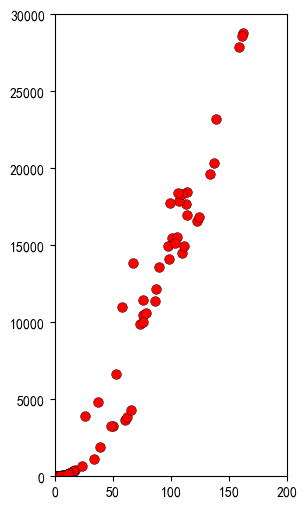

In [69]:
#峰度和偏度似乎呈现高度一致的趋势——当偏度很大时，峰度也倾向于很大，我们可以绘图来看一看
plt.figure(figsize=(3,6),dpi=100)
plt.scatter("偏度","峰度", data = sak
           ,s = 50
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(0, 200) #控制横纵坐标的范围
plt.ylim(0, 30000)
plt.show()

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/%E5%9B%9B%E5%A4%A7%E5%88%86%E7%B1%BB2.PNG)

> - A类 **均值高，偏度低**：用户拥有该资源的分布较为均匀，并且大家都拥有很多这个资源，这类资源是最容易获取的

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/A.PNG)

> - B类 **均值高，偏度也高**：用户拥有该资源的分布不均匀，少量玩家掌握巨量资源（长尾会非常非常长），拉高了均值，这类资源可能是氪金资源，也可能是爆肝才能获得的资源

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/B.PNG)

> - C类 **均值低，偏度也低**：用户拥有该资源的分布较为均匀，但大家都没有这个资源，这类资源可能是需要时间来积累才能够获得的，随着开服时间变长，这类资源应该会逐渐变成其他类型的资源

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/C.PNG)

> - D类 **均值低，偏度高**：用户拥有该资源的分布不均匀，只有少量玩家掌握该资源，但是掌握的总量也不多。这类资源天生稀缺并且无法靠氪金获得（比如必须触发特定剧情/达到特定成就才能够获得的资源），只有少数人能够拥有

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/D.PNG)

在一个健康的游戏中，A类资源应该是最多的，这类资源决定了剧本能够被推进的程度、决定了大部分玩家的游戏体验，B类资源主要用于付费，收入的主要来源，但可能严重破坏游戏平衡，D类资源主要在于增加游戏的趣味和公平性，应该是最少的。一个游戏的A类资源要足够多，才算是对新手比较友好，只要我们绘制出散点图，四类资源的分布情况就目了然了。

In [70]:
print(sak["偏度"].max())
print(sak["偏度"].min())
print(sak["均值"].max())
print(sak["均值"].min())

1446.870493367135
1.229280867942684
585515.5045294879
2.185307999494757e-06


现在的难点在于，偏度与均值都包括部分极大异常点，因此数据极差非常高，而大部分数据点又集中在较小的值附近，这样的数据在绘图时很容易出现以下情况：

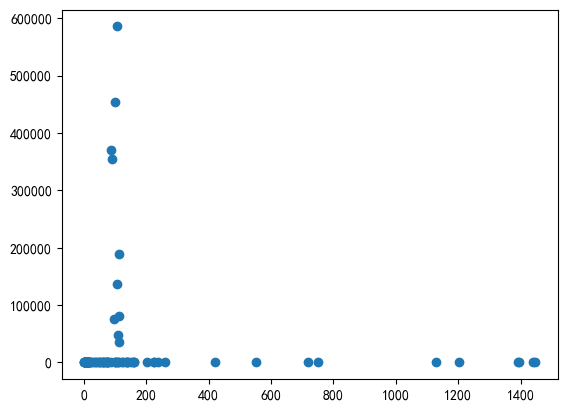

In [71]:
plt.scatter("偏度","均值", data = sak)
plt.show() #所有数据点都堆在一起，看不出任何规律

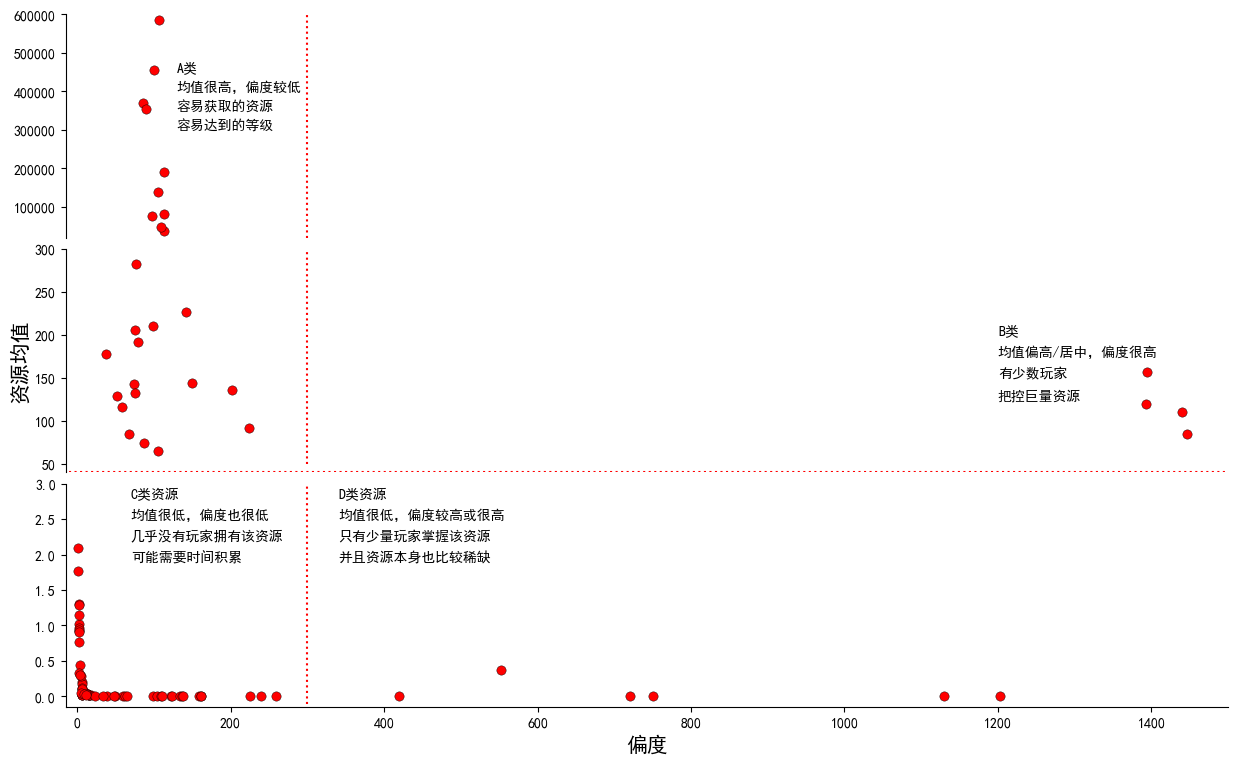

In [72]:
# 为解决这个问题，我们来绘制三个纵坐标数值不同的图像——

plt.figure(figsize=(15,9),dpi=100)
#绘制三个坐标轴不一样的图像

#上
plt.subplot(311)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500) #控制横纵坐标的范围
plt.ylim(20000, 600000)
plt.vlines(300, 20000, 600000,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.text(130,450000,s="A类")
plt.text(130,400000,s="均值很高，偏度较低")
plt.text(130,350000,s="容易获取的资源")
plt.text(130,300000,s="容易达到的等级")
plt.xticks([])

#中
plt.subplot(312)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(40, 300)
plt.vlines(300, 50, 300,colors="red",linestyles="dotted")
plt.hlines(40,-10, 1500,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.ylabel("资源均值", fontsize=15)
plt.text(1200,200,s="B类")
plt.text(1200,175,s="均值偏高/居中，偏度很高")
plt.text(1200,150,s="有少数玩家")
plt.text(1200,125,s="把控巨量资源")
plt.xticks([])

#下
plt.subplot(313)
plt.scatter("偏度","均值", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(-0.15, 3)
plt.vlines(300, -0.1, 5,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("偏度", fontsize=15)
plt.yticks(fontsize=10)
plt.text(70,2.8,s="C类资源")
plt.text(70,2.5,s="均值很低，偏度也很低")
plt.text(70,2.2,s="几乎没有玩家拥有该资源")
plt.text(70,1.9,s="可能需要时间积累")
plt.text(340,2.8,s="D类资源")
plt.text(340,2.5,s="均值很低，偏度较高或很高")
plt.text(340,2.2,s="只有少量玩家掌握该资源")
plt.text(340,1.9,s="并且资源本身也比较稀缺")
plt.subplots_adjust(hspace=0.05)
plt.show()

查看一下四类资源分别有哪些，以及数量是否合理：

In [73]:
#A类
A = sak.loc[sak["均值"] > 3,:].loc[sak["偏度"]<300,:]

In [74]:
A

,特征,偏度,峰度,均值
0,木头获取数量,100.635,15449.582,454306.859
1,木头消耗数量,86.310,11367.448,369843.252
2,石头获取数量,113.794,18489.107,189778.774
3,石头消耗数量,105.043,15515.988,137607.363
4,象牙获取数量,112.636,17682.030,80756.230
5,象牙消耗数量,113.405,16974.594,36131.699
6,肉获取数量,106.645,17907.029,585515.505
7,肉消耗数量,89.403,13600.967,354810.206
8,魔法获取数量,97.762,14958.235,75389.535
9,魔法消耗数量,109.334,18322.774,47253.994


In [75]:
#B类
sak.loc[sak["均值"] > 3,:].loc[sak["偏度"]>300,:]

,特征,偏度,峰度,均值
14,萨满招募数量,1393.339,2048745.112,119.543
15,萨满损失数量,1394.118,2050265.411,156.853
20,萨满伤兵产生数量,1439.747,2141351.573,110.431
21,萨满伤兵恢复数量,1446.870,2155525.025,84.763


In [76]:
#C类 - 大量还未开发的资源 & 大量的等级 - 比较容易获得的资源
sak.loc[sak["均值"] < 3,:].loc[sak["偏度"]<300,:].shape[0]

60

In [77]:
#D类 - 极度稀缺的资源
sak.loc[sak["均值"] < 3,:].loc[sak["偏度"]>300,:]

# sak.loc[sak["均值"] < 3,:].loc[sak["偏度"]>300,:].shape[0]

,特征,偏度,峰度,均值
31,治疗加速使用数量,551.767,567898.986,0.370
69,科研：部队攻击,720.086,552951.148,0.000
93,科研：据点四,419.521,175995.923,0.000
94,科研：增援部队容量,1202.368,1569458.101,0.000
95,科研：行军大小,750.277,623089.356,0.000
96,科研：资源帮助容量,1130.278,1333821.383,0.000


In [78]:
data.loc[:,A["特征"]].describe().T

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
木头获取数量,2288007.000,454306.859,4958667.146,0.000,0.000,42038.000,153118.000,1239962311.000
木头消耗数量,2288007.000,369843.252,3737720.038,0.000,0.000,9830.000,98557.000,799587506.000
石头获取数量,2288007.000,189778.774,4670619.517,0.000,0.000,0.000,0.000,1214869437.000
石头消耗数量,2288007.000,137607.363,3370166.356,0.000,0.000,0.000,0.000,796237770.000
象牙获取数量,2288007.000,80756.230,2220540.322,0.000,0.000,0.000,0.000,574496104.000
象牙消耗数量,2288007.000,36131.699,1782498.688,0.000,0.000,0.000,0.000,448197157.000
肉获取数量,2288007.000,585515.505,5868629.397,0.000,0.000,34587.000,136001.000,1470643810.000
肉消耗数量,2288007.000,354810.206,3400632.455,0.000,0.000,6470.000,66054.000,888953714.000
魔法获取数量,2288007.000,75389.535,966289.236,0.000,0.000,0.000,0.000,263722820.000


从分析的结果来看，各项资源的配比数量其实还算合理。假设一款游戏只想服务氪金玩家，那B类资源会很多、大量A类资源的获取渠道也会转向氪金方向，但《野蛮时代》明显没有这样的设计，在游戏早期只有兵种萨满相关的集中资源和技能是需要氪金的，说明游戏依然在致力于为普通玩家提供较好的体验，所以大部分用户应该不是因为新手关太难、剧情无法推进才退游的。然而，各类资源的可获取量其实有很大的差异，基础资源动辄就上百万甚至上亿，可能会让用户获得感严重不足。而从A类资源的分布来看，只有木头和肉这两种最最最基础的资源是分布较为正常的，其他资源都是严重左偏，**说明“留存率低”是原因，“资源数据的异常”是结果**。最有可能的情况就是产品逻辑不顺、获得感不足、美工不足、系统BUG（比如疯狂闪退等等）、或者强烈的捞金感/不高级感让大部分用户在第一天就流失掉了。

### 3.3 平衡性影响：氪金与战斗优势

如果游戏对于新手并非很难上手，那是否是战斗力系统的设置让非氪玩家感觉不太友好呢？过于强大的角色、过于强大的技能和道具都可能影响游戏平衡性，平衡性这个复杂的指标其实可以从很多方面来进行考虑，可惜在现有数据下，我们能够考虑的唯有胜率。我们可以分析氪金用户与不氪金用户的战力差异，来判断氪金对游戏平衡性的影响。

In [79]:
data.columns.tolist()

['玩家唯一ID',
 '玩家注册时间',
 '木头获取数量',
 '木头消耗数量',
 '石头获取数量',
 '石头消耗数量',
 '象牙获取数量',
 '象牙消耗数量',
 '肉获取数量',
 '肉消耗数量',
 '魔法获取数量',
 '魔法消耗数量',
 '勇士招募数量',
 '勇士损失数量',
 '驯兽师招募数量',
 '驯兽师损失数量',
 '萨满招募数量',
 '萨满损失数量',
 '勇士伤兵产生数量',
 '勇士伤兵恢复数量',
 '驯兽师伤兵产生数量',
 '驯兽师伤兵恢复数量',
 '萨满伤兵产生数量',
 '萨满伤兵恢复数量',
 '通用加速获取数量',
 '通用加速使用数量',
 '建筑加速获取数量',
 '建筑加速使用数量',
 '科研加速获取数量',
 '科研加速使用数量',
 '训练加速获取数量',
 '训练加速使用数量',
 '治疗加速获取数量',
 '治疗加速使用数量',
 '建筑：士兵小屋等级',
 '建筑：治疗小井等级',
 '建筑：要塞等级',
 '建筑：据点传送门等级',
 '建筑：兵营等级',
 '建筑：治疗之泉等级',
 '建筑：智慧神庙等级',
 '建筑：联盟大厅等级',
 '建筑：仓库等级',
 '建筑：瞭望塔等级',
 '建筑：魔法幸运树等级',
 '建筑：战争大厅等级',
 '建筑：联盟货车等级',
 '建筑：占卜台等级',
 '建筑：祭坛等级',
 '建筑：冒险传送门等级',
 '科研：侦查等级',
 '科研：训练速度等级',
 '科研：守护者',
 '科研：巨兽驯兽师',
 '科研：吟唱者',
 '科研：勇士攻击',
 '科研：驯兽师攻击',
 '科研：萨满攻击',
 '科研：战斗大师',
 '科研：高阶巨兽骑兵',
 '科研：图腾大师',
 '科研：部队防御',
 '科研：勇士防御',
 '科研：驯兽师防御',
 '科研：萨满防御',
 '科研：勇士生命',
 '科研：驯兽师生命',
 '科研：萨满生命',
 '科研：狂战士',
 '科研：龙骑兵',
 '科研：神谕者',
 '科研：部队攻击',
 '科研：建造速度',
 '科研：资源保护',
 '科研：部队消耗',
 '科研：木材生产',
 '科研：石头生产',
 '科研：象牙生产',
 '科研：肉类生产',
 '科研：木材采集',
 '科研：石头采集',


In [80]:
#7日氪金玩家的人均PVP次数 - 氪金玩家是否热衷于战斗
data[data["付费金额"] !=0]["PVP次数"].mean()

25.193802939260117

In [81]:
#7日氪金玩家PVP胜率 分布
(data[data["付费金额"] !=0]["PVP胜利次数"]/data[data["付费金额"] !=0]["PVP次数"]).describe()

count   35755.000
mean        0.533
std         0.360
min         0.000
25%         0.200
50%         0.600
75%         0.865
max         1.000
dtype: float64

可以看到，人均PVP胜率是53.27%，对手游付费玩家来说是个可以接受的数字，但并不是特别大的优势。其中count数是少于总付费玩家的人数的，说明有部分玩家的PVP次数为0，为避免除0错误因此剔除了这些玩家。不参与PVP的玩家占比为：

In [82]:
# 13%的付费玩家从不玩PVP
1 - 35755/data[data["付费金额"] !=0].shape[0] 

0.1371654721397717

In [83]:
# 不氪金玩家的人均PVP次数
data[data["付费金额"] == 0]["PVP次数"].mean()

1.723228497868749

In [84]:
# 不氪金玩家PVP胜率分布
(data[data["付费金额"] == 0]["PVP胜利次数"]/data[data["付费金额"] ==0]["PVP次数"]).describe()

count   539947.000
mean         0.254
std          0.355
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

对非付费玩家而言，人均PVP胜率只有25%，并且75%的人的场均胜率不到50%，这个条件对非付费玩家来说的确比较苛刻。

同样，不氪金玩家中也有部分玩家的PVP次数为0，即一次也没有参与。来看不氪金玩家中参与PVP的人数占比：

In [85]:
1 - 539947/data[data["付费金额"] ==0].shape[0]

0.7596569522934539

这个比例奇高，当然，不氪金用户中有许多人可能是已经流失的用户，因此当然不会参与PVP对战。

In [86]:
# 氪金玩家会更好战？ 不氪金玩家会更佛系？
(data[data["付费金额"] ==0]["主动发起PVP次数"]/data[data["付费金额"] ==0]["PVP次数"]).describe()

count   539947.000
mean         0.262
std          0.365
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

不付费玩家则有26%的时候主动发起对战，不过大多数时候75%的人都不会发起对战。

如果PVP状况下是付费玩家占绝对优势，那PVE也是相同的情况吗？

**PVE情况**

In [87]:
#氪金玩家PVE胜率分布
(data[data["付费金额"] !=0]["PVE胜利次数"]/data[data["付费金额"] !=0]["PVE次数"]).describe()

count   37389.000
mean        0.885
std         0.141
min         0.000
25%         0.840
50%         0.926
75%         0.988
max         1.000
dtype: float64

In [88]:
#不氪金玩家PVE胜率分布
(data[data["付费金额"] ==0]["PVE胜利次数"]/data[data["付费金额"] ==0]["PVE次数"]).describe()

count   703148.000
mean         0.921
std          0.179
min          0.000
25%          0.965
50%          1.000
75%          1.000
max          1.000
dtype: float64

不难发现，不氪金玩家的PVE平均胜率有92%，是高于氪金玩家的品滚胜率88%的，看来环境怪兽都比较弱小，大部分玩家都能够轻松战胜。当PVP上氪金玩家有绝对优势时，不氪金玩家许多会选择在PVE环境中进行战斗，因此我们推断不氪金玩家主动发起PVE战斗的情况会更多：

In [89]:
#在PVE系统中，付费玩家主动发起战斗的概率
(data[data["付费金额"] !=0]["主动发起PVE次数"]/data[data["付费金额"] !=0]["PVE次数"]).describe()

count   37389.000
mean        0.991
std         0.067
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
dtype: float64

In [90]:
#在PVE系统中，不付费玩家主动发起战斗的概率
(data[data["付费金额"] == 0]["主动发起PVE次数"]/data[data["付费金额"] ==0]["PVE次数"]).describe()

count   703148.000
mean         0.996
std          0.056
min          0.000
25%          1.000
50%          1.000
75%          1.000
max          1.000
dtype: float64

氪金与不氪金玩家主动放弃PVE的可能性都非常高，几乎所有人都是主动发起PVE战斗，这可能说明PVE战斗是发展城市必须的环节（比如收集资源肉类需要猎杀野猪等生物、获取魔法道具需要猎杀龙、哥布林等生物）。从分析的结果来看，氪金并不会对PVE战斗有影响，主要是影响PVP。

《野蛮时代》中玩家或许可以夺取其他玩家的领地和城池，因此PVP对战的平衡性对玩家流失有重要的影响。前期留存下来，但后期逐渐流失的非氪金用户有一定的可能是因为PVP胜率太低而离开

### 3.4 左偏带来长尾：谁是异常玩家？
在特征高度左偏的情况下，数据中必然含有大量的异常值，这些异常值可能代表着某些特殊的人群，但带入异常值进行建模会严重影响模型的稳定性，导致模型容易过拟合。因此在建模之前，我们需要对异常值进行简单的探索，以确定异常值的处理方法。


异常值：
- 业务上的异常值
- 统计学上的异常值

1. 业务上的异常值

>从游戏业务角度而言，所有的资源/人物等级/胜利次数/金额等不应该出现负数，因此首先排查负数

>如果存在用户信息，则需要排查年龄不为负，年龄不过高或过低等状况

>查看是否有上线时间较短，但是资源量异常丰富的账号，可能是GM，也可能有人作弊

In [91]:
data.columns[2:-1] 
# 不对ID，注册时间和标签（45日付费金额）计算异常值

Index(['木头获取数量', '木头消耗数量', '石头获取数量', '石头消耗数量', '象牙获取数量', '象牙消耗数量', '肉获取数量',
       '肉消耗数量', '魔法获取数量', '魔法消耗数量',
       ...
       '科研：资源帮助容量', 'PVP次数', '主动发起PVP次数', 'PVP胜利次数', 'PVE次数', '主动发起PVE次数',
       'PVE胜利次数', '在线时长', '付费金额', '付费次数'],
      dtype='object', name='字段解释', length=106)

In [92]:
AbnormalCheck = data.iloc[:,2:-1]

In [93]:
AbnormalCheck.info() #确认已没有任何object对象

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 106 entries, 木头获取数量 to 付费次数
dtypes: float64(12), int64(94)
memory usage: 1.8 GB


In [94]:
# 确认无小于0的值
(AbnormalCheck < 0).sum().sum() 

0

通常我们还会检查在线时间很短但却拥有很多资源的账号，可能是作弊账号

但以目前游戏1分钟积累4w资源、3分钟积累十几万资源的状况来看，很难去判断资源出现异常的“阈值”

In [95]:
AbnormalCheck.loc[AbnormalCheck["在线时长"] < 30,:]

字段解释,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,魔法消耗数量,...,科研：资源帮助容量,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数
0,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,1.167,0.000,0
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,3.167,0.000,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,2.333,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288002,15500.000,3700.000,0.000,0.000,0.000,0.000,13000.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.500,0.000,0
2288003,10000.000,0.000,0.000,0.000,0.000,0.000,10000.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.833,0.000,0
2288004,131589.000,71287.000,0.000,0.000,6000.000,0.000,249356.000,39524.000,0.000,0.000,...,0,0,0,0,2,2,2,4.333,0.000,0
2288005,221984.000,122401.000,0.000,0.000,0.000,0.000,208184.000,74738.000,0.000,0.000,...,0,0,0,0,1,1,1,2.833,0.000,0


2. 统计上的异常值
 > 数据正态分布，异常数据落在正态分布区域外、尾巴上<br>
 > 异常值识别规则：
 >- 箱线图法则
 >- 3sigma法则
 
通常我们倾向于使用箱线图来查找异常值，但与绘制分布图时的情况一致，**箱线图函数无法处理百万级别数据** <br> 因此我们依然退而求其次，使用计算方式来进行评估

- 箱线图的法则：
> **当任意样本的特定特征值超出 [QL-1.5\*IQR, QU+1.5*IQR]时，则认为该样本的该特征值是异常值**<br>
> QL:下四分位数，QU：上四分位数，IQR：QU-QL<br>

箱型图识别异常值的依据是依赖四分位数计算，四分位数是比较鲁棒的，因为超出四分位数的那25%的数据无论有多大、多异常都不会影响到四分位数本身。因此箱型图的异常值检测结果比较客观、也比较严格，在识别异常值方面有一定的优越性。但由于该规则比较严格，在极度左偏数据下可能会刷掉大量数据。

- 3sigma法则：
> **(当任意样本的特定特征值 - 该特征的均值) > 3*特征的标准差，则认为该样本的特征值是异常值**<br>

在统计学上，任意数据的数据范围位于[-3sigma, 3sigma]之间的概率是99.73%，因此3sigma法则的对异常值的评价标准实际上十分宽松。不过，3sigma假设数据应该满足正态分布，这一点与我们的数据不太相符。

- 一定会出现的情况：由于数据高度左偏，因此异常值一定是出现在高于上分位数的方向，也就是玩家资源过多/等级过高时就会被判断为异常。而资源较多、等级较高的玩家也是游戏整体参与度较高的玩家，因此这类玩家很可能就是氪金用户。

[QL - 1.5IQR   ,  QU+1.5IQR]

(feature < QL - 1.5IQR).astype(int) #---->布尔值 
+
(feature > QU + 1.5IQR).astype(int) #---->布尔值

**箱线图法则**


In [96]:
#打印异常比例，保存异常样本的索引
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
BoxAbnormalIdx = [] #列表：用于保存我们的异常值的索引
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    #过小或过大的都属于异常值
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)
    abnormal.loc[idx,"特征"] = column
    abnormal.loc[idx,"异常值数量"] = error.shape[0]
    abnormal.loc[idx,"异常值比例"] = "{:.3f}%".format(error.shape[0]*100/NumOfSamples)

In [97]:
len(BoxAbnormalIdx) #这里面是有重复值的

16670991

In [98]:
BoxAbnormalIdx = set(BoxAbnormalIdx) #利用集合对筛选出的异常值的索引进行去重

In [99]:
len(BoxAbnormalIdx) #超过100w数据都被归为异常，数量太多无法直接删除，何况在7日内付费的用户只有4w多，很可能被这100多万数据囊括

1123706

In [100]:
abnormal.sort_values("异常值比例",ascending=False) #左偏比较严重的特征异常值更多

,特征,异常值数量,异常值比例
39,建筑：联盟大厅等级,215420.000,9.415%
15,萨满损失数量,207173.000,9.055%
26,科研加速获取数量,195901.000,8.562%
20,萨满伤兵产生数量,183496.000,8.020%
84,科研：据点耐久,162146.000,7.087%
43,建筑：战争大厅等级,160448.000,7.013%
70,科研：建造速度,147491.000,6.446%
14,萨满招募数量,146429.000,6.400%
47,建筑：冒险传送门等级,145062.000,6.340%
17,勇士伤兵恢复数量,131702.000,5.756%


**3sigma法则**

In [101]:
#打印异常比例，保存异常样本的索引
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
SigmaAbnormalIdx = []
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    mean_ = feature.mean()
    std_ = feature.std()
    error = feature[feature - mean_ > 3*std_]
    SigmaAbnormalIdx.extend(error.index)
    abnormal.loc[idx,"特征"] = column
    abnormal.loc[idx,"异常值数量"] = error.shape[0]
    abnormal.loc[idx,"异常值比例"] = "{:.3f}%".format(error.shape[0]*100/NumOfSamples)

In [102]:
len(SigmaAbnormalIdx)

2580755

In [103]:
SigmaAbnormalIdx = set(SigmaAbnormalIdx) #对异常样本索引去重

In [104]:
len(SigmaAbnormalIdx) 
# 23w样本是异常，这是一个可以接受的数字，可以直接删除，但放入模型后的效果不知道怎么样

233350

**在箱线图规则下，我们看看这些异常用户的游戏时间/氪金情况**

In [105]:
type(BoxAbnormalIdx)

data.loc[list(BoxAbnormalIdx),"在线时长"]

2097154     1.167
2097155     1.333
2097156     2.500
2097157     3.833
2097160   753.667
            ...  
2097138     0.500
2097143     2.333
2097144     2.333
2097149    12.167
2097151     1.167
Name: 在线时长, Length: 1123706, dtype: float64

In [106]:
data.loc[list(BoxAbnormalIdx),"在线时长"].describe() #在在线时长上，表现是位于氪金用户与不可尽用户之间

count   1123706.000
mean         19.579
std          53.996
min           0.000
25%           2.333
50%           4.500
75%          11.667
max        2049.667
Name: 在线时长, dtype: float64

In [107]:
(data.loc[list(BoxAbnormalIdx),"付费金额"] != 0).sum() #在异常用户中，付费用户的数量

41439

In [108]:
(data.loc[:,"付费金额"] != 0).sum() #所有7日付费用户数

41439

In [109]:
(data.loc[list(BoxAbnormalIdx),"45日付费金额"] != 0).sum() #在异常用户中，付费用户的数量

45670

In [110]:
(data.loc[:,"45日付费金额"] != 0).sum() #所有7日付费用户数

45988

付费用户被100%包含在了异常用户里，这说明：
> - 付费用户的数据在现有数据的大背景下（大部分用户短时间快速流失掉）下，在统计上是完全异常的，因此建模时想要辨认出付费用户，模型需要很深入的学习，有很高的过拟合风险<br>
> - 异常用户有100w，其中只有4w多付费，即许多与氪金用户行为高度相似的用户都没有氪金，对算法来说这部分用户是很难判断的

在进行算法建模时，需要更加灵活的方法来处理这些异常数据。